In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
joint_uni = pd.read_csv('outputs/uni_area/joint-waiting-queue/joint-waiting-queue_conn0_ep10.csv')[['step','system_total_stopped']]
joint_uni.set_index('step')
joint_7th = pd.read_csv('outputs/7th-area/joint-waiting-queue/joint-waiting-queue_conn0_ep6.csv')[['step','system_total_stopped']]
joint_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [3]:
queue_uni = pd.read_csv('outputs/uni_area/queue/queue_conn3_ep10.csv')[['step','system_total_stopped']]
queue_uni.set_index('step')
queue_7th = pd.read_csv('outputs/7th-area/queue/queue_conn1_ep2.csv')[['step','system_total_stopped']]
queue_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [4]:
diff_uni = pd.read_csv('outputs/uni_area/diff-waiting-time/diff-waiting-time_conn1_ep10.csv')[['step','system_total_stopped']]
diff_uni.set_index('step')
diff_7th = pd.read_csv('outputs/7th-area/diff-waiting-time/diff-waiting-time_conn0_ep4.csv')[['step','system_total_stopped']]
diff_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [5]:
pressure_uni = pd.read_csv('outputs/uni_area/pressure/pressure_conn4_ep9.csv')[['step','system_total_stopped']]
pressure_uni.set_index('step')
pressure_7th = pd.read_csv('outputs/7th-area/pressure/pressure_conn4_ep6.csv')[['step','system_total_stopped']]
pressure_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [6]:
fixed_uni = pd.read_xml('nets/uni-area/fixed_time.xml')[['time','halting']]
fixed_uni.set_index('time')
fixed_7th = pd.read_xml('nets/7th-area/fixed_time.xml')[['time','halting']]
fixed_7th.set_index('time')

,halting
time,
0.0,1
1.0,0
2.0,0
3.0,1
4.0,1
...,...
4290.0,0
4291.0,0
4292.0,0


In [29]:
non_zero_fixed_7th = fixed_7th[fixed_7th['halting']!=0]
non_zero_fixed_uni = fixed_uni[fixed_uni['halting']!=0]
averages_fixed = {'uni': non_zero_fixed_uni['halting'].mean(), '7th': non_zero_fixed_7th['halting'].mean()}
# list(non_zero_fixed_uni['time'])[-1]

In [30]:
non_zero_pressure_7th = pressure_7th[pressure_7th['system_total_stopped'] != 0]
non_zero_queue_7th = queue_7th[queue_7th['system_total_stopped'] != 0]
non_zero_joint_7th = joint_7th[joint_7th['system_total_stopped'] != 0]
non_zero_diff_7th = diff_7th[diff_7th['system_total_stopped'] != 0]
non_zero_diff_uni = diff_uni[diff_uni['system_total_stopped'] != 0]
non_zero_joint_uni = joint_uni[joint_uni['system_total_stopped'] != 0]
non_zero_queue_uni = queue_uni[queue_uni['system_total_stopped'] != 0]
non_zero_pressure_uni = pressure_uni[pressure_uni['system_total_stopped'] != 0]
averages_rl = {'7th': {
        'joint': non_zero_joint_7th['system_total_stopped'].mean(),
        'queue': non_zero_queue_7th['system_total_stopped'].mean(),
        'diff': non_zero_diff_7th['system_total_stopped'].mean(),
        'pressure': non_zero_pressure_7th['system_total_stopped'].mean()
    },
    'uni': {
        'joint': non_zero_joint_uni['system_total_stopped'].mean(),
        'queue': non_zero_queue_uni['system_total_stopped'].mean(),
        'diff': non_zero_diff_uni['system_total_stopped'].mean(),
        'pressure': non_zero_pressure_uni['system_total_stopped'].mean()
    }
}
print(averages_rl['7th'])
print(averages_rl['uni'])
print(averages_fixed)

{'joint': 2.5177195685670264, 'queue': 2.90785498489426, 'diff': 2.885670731707317, 'pressure': 3.4704184704184704}
{'joint': 54.52341311134235, 'queue': 49.534322820037104, 'diff': 62.08040201005025, 'pressure': 72.33461909353906}
{'uni': 200.06885415321017, '7th': 24.233574879227053}


In [35]:
fixed_7th_settling_time = list(non_zero_fixed_7th['time'])[-1]
fixed_uni_setting_time = list(non_zero_fixed_uni['time'])[-1]
print(fixed_7th_settling_time, fixed_uni_setting_time)

4186.0 7970.0


In [48]:
queue_7th_settling_time = list(non_zero_queue_7th['step'])[-1]
pressure_7th_settling_time = list(non_zero_pressure_7th['step'])[-1]
diff_7th_settling_time = list(non_zero_diff_7th['step'])[-1]
joint_7th_settling_time = list(non_zero_joint_7th['step'])[-1]

queue_uni_settling_time = list(non_zero_queue_uni['step'])[-1]
pressure_uni_settling_time = list(non_zero_pressure_uni['step'])[-1]
diff_uni_settling_time = list(non_zero_diff_uni['step'])[-1]
joint_uni_settling_time = list(non_zero_joint_uni['step'])[-1]
print('queue','pressure','diff','joint',sep='| \t',end='\n----------------\n')
print(queue_7th_settling_time,pressure_7th_settling_time,diff_7th_settling_time, joint_7th_settling_time, sep='\t',end='\n----------------\n')
print(queue_uni_settling_time,pressure_uni_settling_time,diff_uni_settling_time, joint_uni_settling_time, sep='\t')


queue| 	pressure| 	diff| 	joint
----------------
3755.0	3750.0	3690.0	3785.0
----------------
5410.0	5200.0	4140.0	4820.0


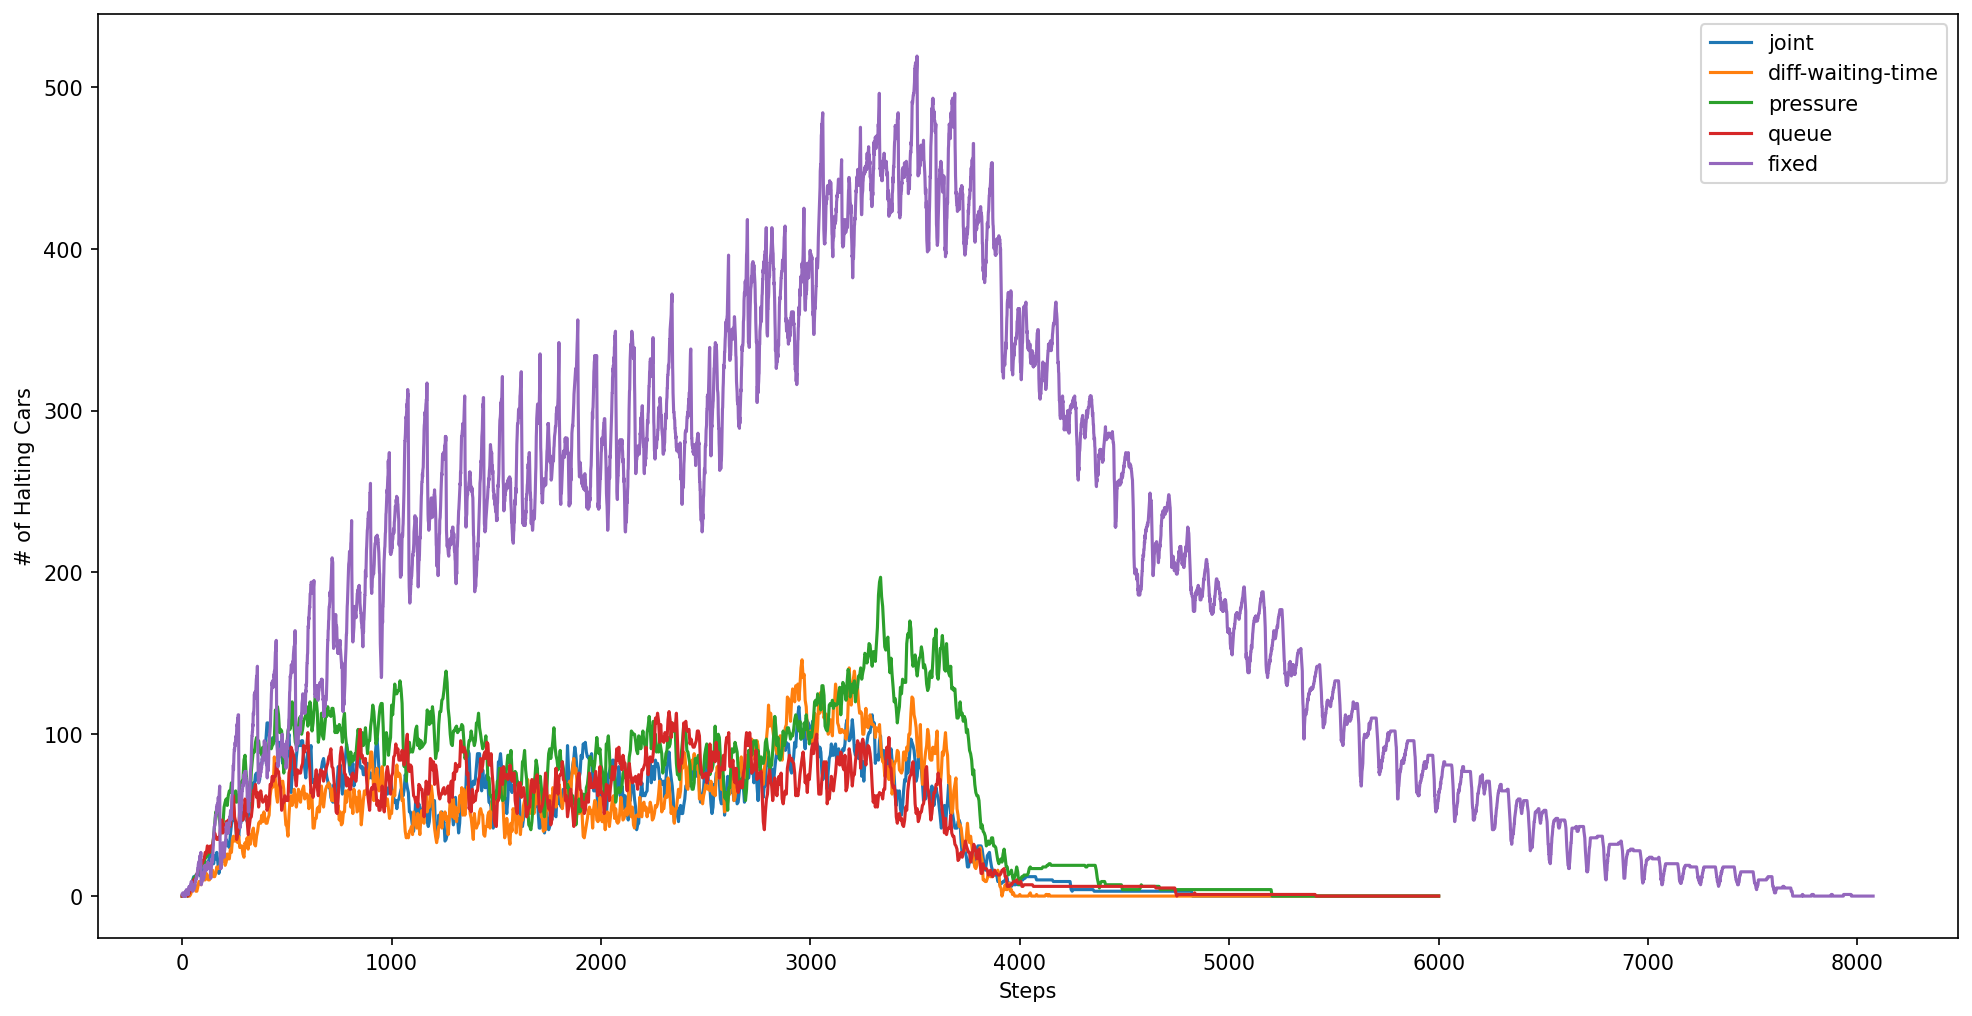

In [10]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(joint_uni['step'],joint_uni['system_total_stopped'], label='joint')
plt.plot(diff_uni['step'],diff_uni['system_total_stopped'], label='diff-waiting-time')
plt.plot(pressure_uni['step'],pressure_uni['system_total_stopped'], label='pressure')
plt.plot(queue_uni['step'],queue_uni['system_total_stopped'], label='queue')
plt.plot(fixed_uni['time'], fixed_uni['halting'], label='fixed')
plt.xlabel('Steps')
plt.ylabel('# of Halting Cars')
plt.legend()

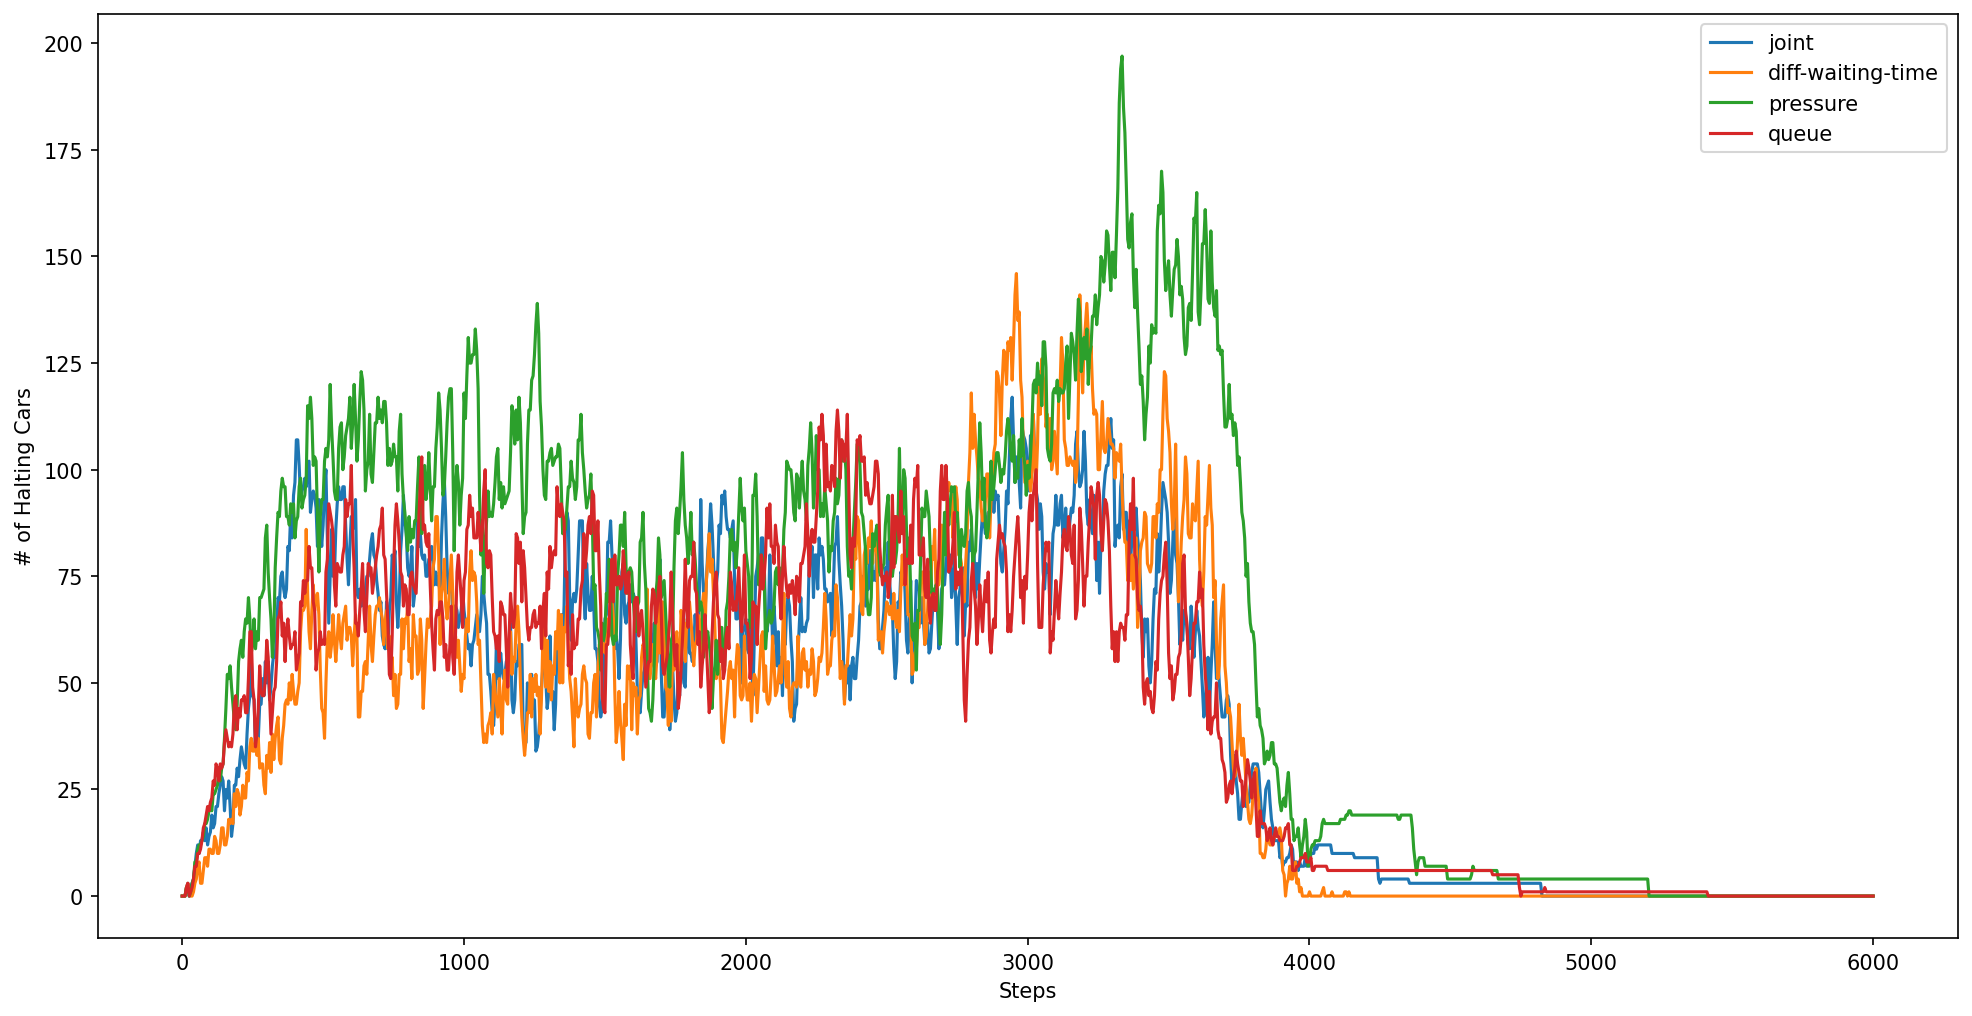

In [11]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(joint_uni['step'],joint_uni['system_total_stopped'], label='joint')
plt.plot(diff_uni['step'],diff_uni['system_total_stopped'], label='diff-waiting-time')
plt.plot(pressure_uni['step'],pressure_uni['system_total_stopped'], label='pressure')
plt.plot(queue_uni['step'],queue_uni['system_total_stopped'], label='queue')
# plt.plot(fixed_uni['time'], fixed_uni['halting'], label='fixed')
plt.xlabel('Steps')
plt.ylabel('# of Halting Cars')
plt.legend()

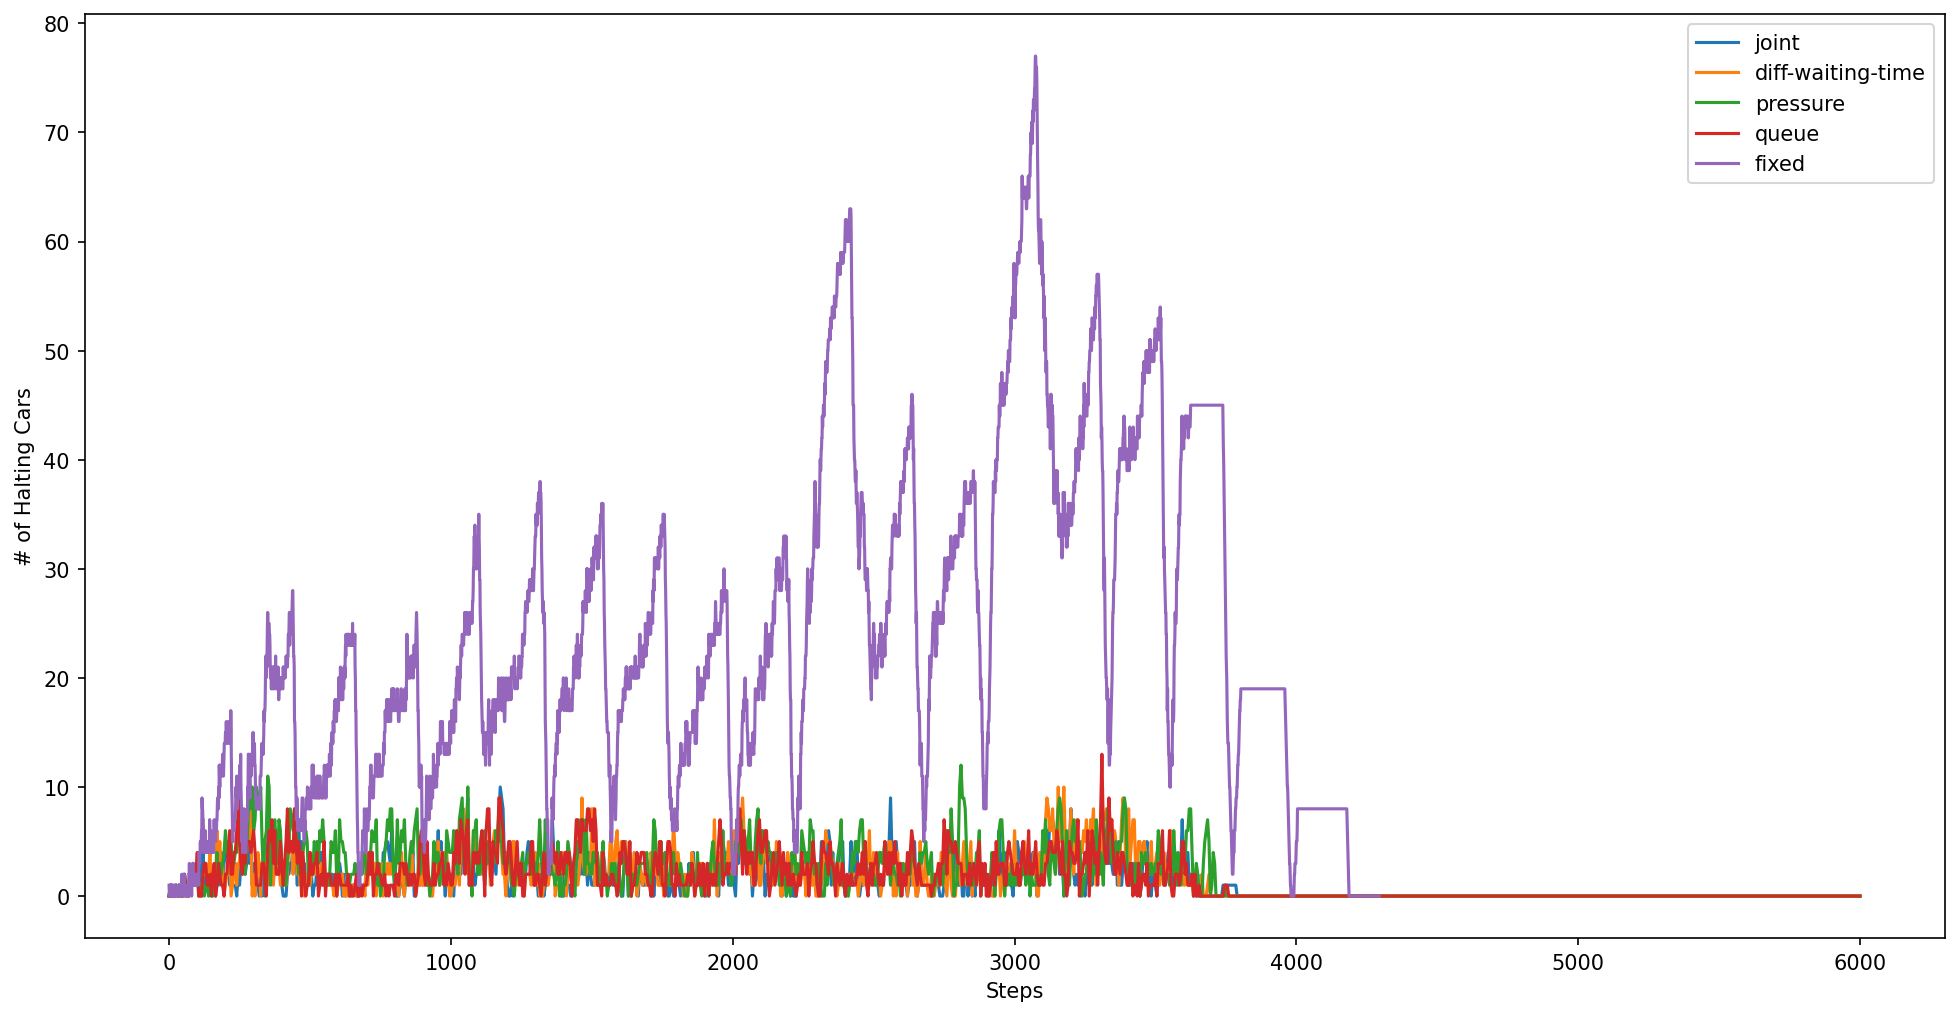

In [12]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(joint_7th['step'],joint_7th['system_total_stopped'], label='joint')
plt.plot(diff_7th['step'],diff_7th['system_total_stopped'], label='diff-waiting-time')
plt.plot(pressure_7th['step'],pressure_7th['system_total_stopped'], label='pressure')
plt.plot(queue_7th['step'],queue_7th['system_total_stopped'], label='queue')
plt.plot(fixed_7th['time'], fixed_7th['halting'], label='fixed')
plt.xlabel('Steps')
plt.ylabel('# of Halting Cars')
plt.legend()

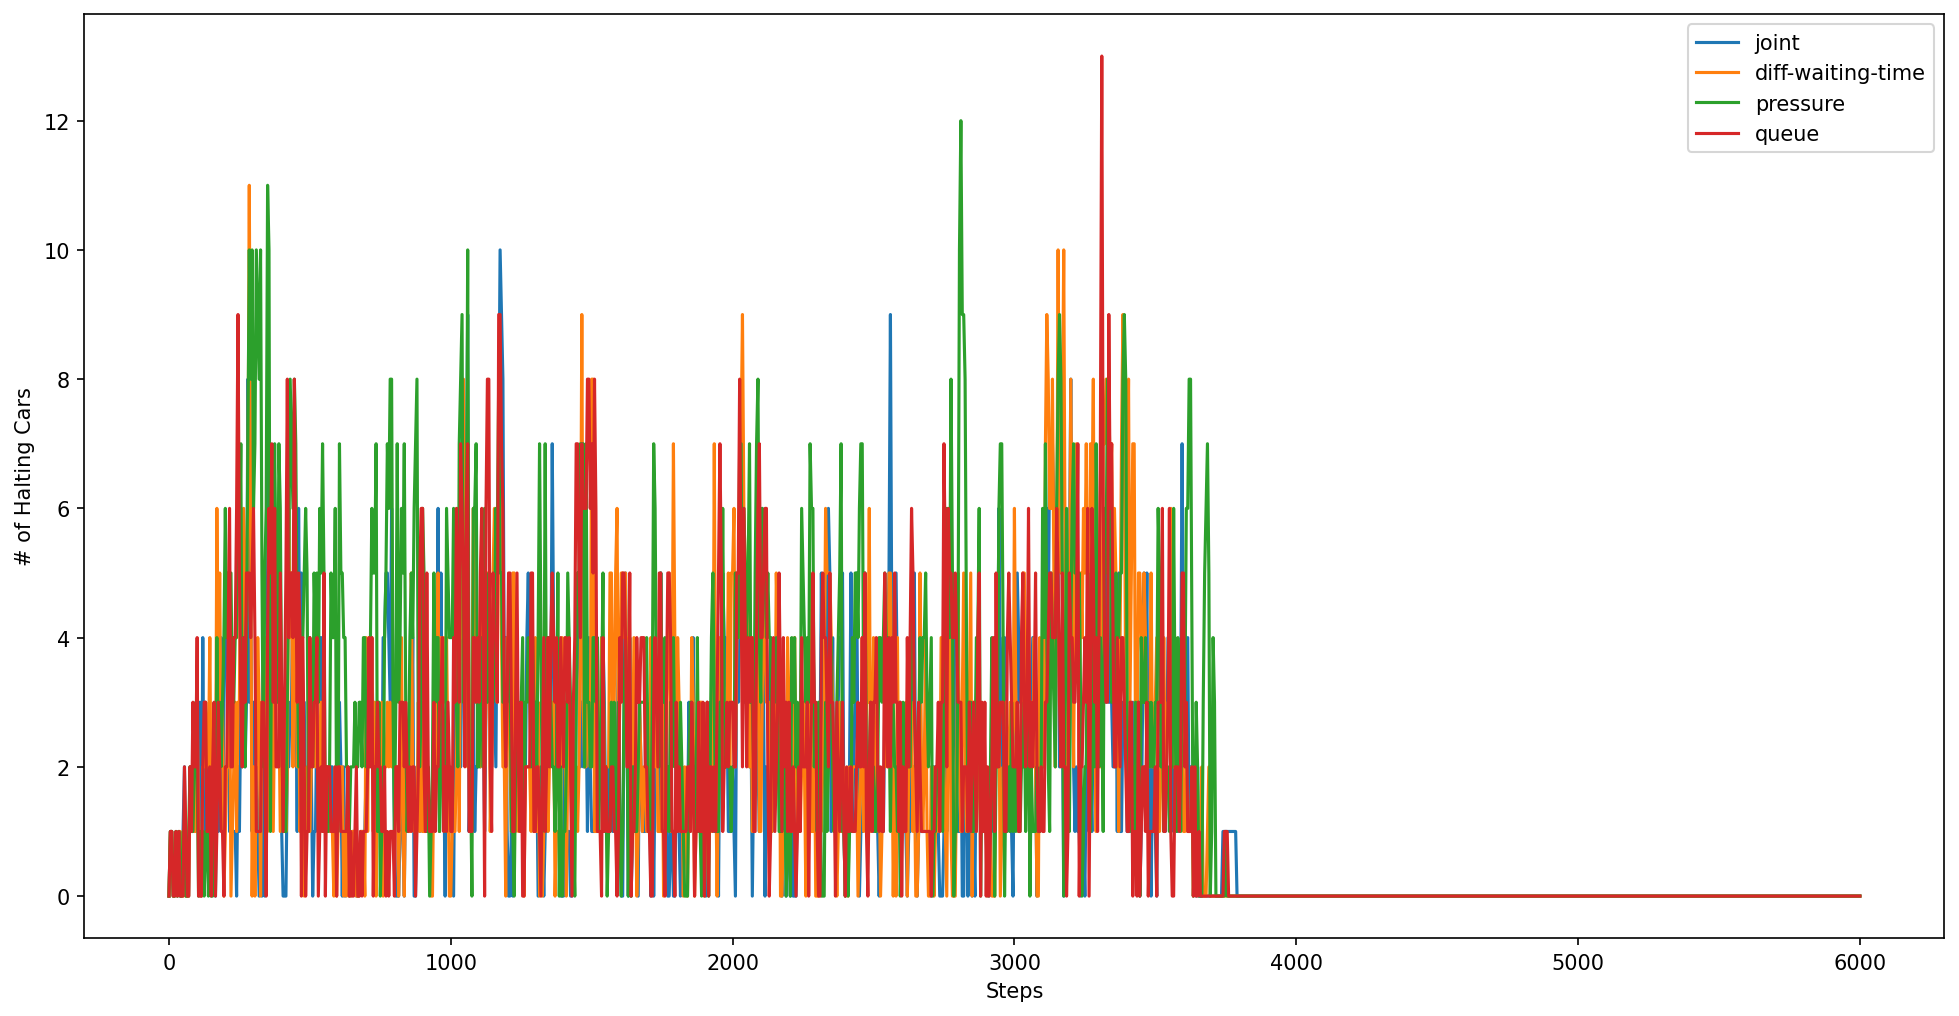

In [49]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(joint_7th['step'],joint_7th['system_total_stopped'], label='joint')
plt.plot(diff_7th['step'],diff_7th['system_total_stopped'], label='diff-waiting-time')
plt.plot(pressure_7th['step'],pressure_7th['system_total_stopped'], label='pressure')
plt.plot(queue_7th['step'],queue_7th['system_total_stopped'], label='queue')
# plt.plot(fixed_7th['time'], fixed_7th['halting'], label='fixed')
plt.xlabel('Steps')
plt.ylabel('# of Halting Cars')
plt.legend()